In [8]:
#The project is on an online AI coach, which best describes the real-time analysis of a gaming scenario, enabling us to know the status of our 
# Pokémon's battle status gives real-time power to control the game and get a better gaming experience
#It's name is pokeStream Coach.
import cv2
import nltk
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from groq import Groq
import matplotlib.pyplot as plt
from PIL import Image
import warnings; warnings.filterwarnings('ignore')
nltk.download('punkt', quiet=True)

print("Pokestream coach ready and booted up")



Pokestream coach ready and booted up


In [9]:

GROQ_API_KEY = "gsk-your-key-here"  
client = Groq(api_key=GROQ_API_KEY)

print(f"Groq LLM Connected")
print(" Ready for professional battle analysis!")


Groq LLM Connected
 Ready for professional battle analysis!


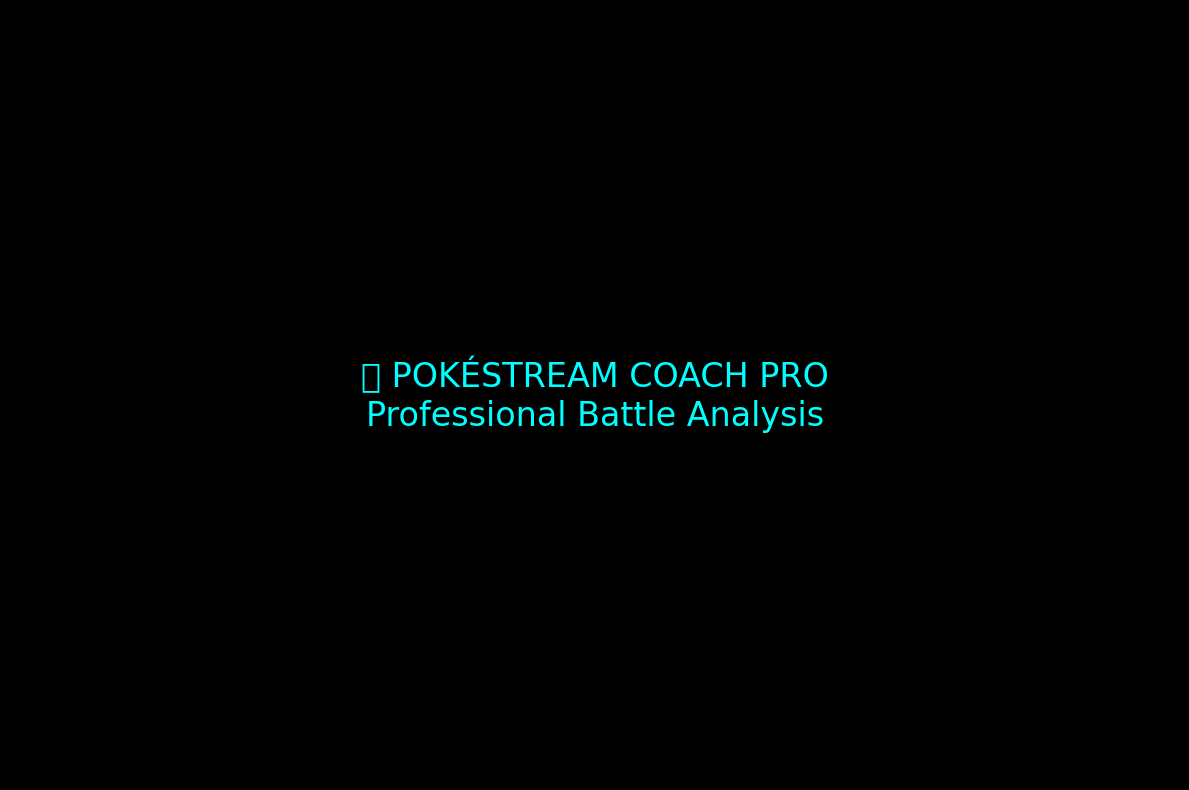

Professional Dashboard Ready


In [10]:

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 8))
ax.text(0.5, 0.5, '🚀 POKÉSTREAM COACH PRO\nProfessional Battle Analysis', 
        ha='center', va='center', fontsize=24, color='cyan')
ax.axis('off')
plt.tight_layout()
plt.show()


In [11]:
def professional_battle_analyzer(image_path):
    """Advanced OpenCV: HP Detection + Hazards + Status"""
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # HP Bars (Professional Color Ranges)
    player_hp_mask = cv2.inRange(hsv, np.array([0,100,100]), np.array([15,255,255]))
    opponent_hp_mask = cv2.inRange(hsv, np.array([35,100,100]), np.array([85,255,255]))
    
    # Hazard Detection (Stealth Rock, Spikes)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hazards = np.std(gray) > 40
    
    features = {
        'player_hp': np.sum(player_hp_mask > 0) / player_hp_mask.size * 100,
        'opponent_hp': np.sum(opponent_hp_mask > 0) / opponent_hp_mask.size * 100,
        'hazards_detected': hazards,
        'field_complexity': np.std(gray)
    }
    return features

print("Advanced Computer Vision Ready")



Advanced Computer Vision Ready


In [12]:

import nltk
print("Downloading NLTK data")
nltk.download('punkt', quiet=False)
nltk.download('punkt_tab', quiet=False) 
nltk.download('averaged_perceptron_tagger', quiet=False)


#Test my function
def parse_pro_logs(log_text):
    """Professional NLTK: Extract battle events"""
    tokens = nltk.word_tokenize(log_text.lower())
    events = {
        'critical_hits': sum(tokens.count(w) for w in ['crit', 'critical']),
        'misses': tokens.count('miss'),
        'hazards': sum(tokens.count(h) for h in ['stealth', 'rock', 'spikes', 'toxic']),
        'kos': tokens.count('ko') + tokens.count('faint')
    }
    return events

demo_log = "stealth rock set | crit thunderbolt | miss flamethrower | ko"
print("NLTK Parsed:", parse_pro_logs(demo_log))




NLTK Parsed: {'critical_hits': 1, 'misses': 1, 'hazards': 2, 'kos': 1}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
def generate_pro_coaching(features, win_prob, log_events):
    prompt = f"""
    POKÉSTREAM COACH PRO - PROFESSIONAL ANALYSIS
    
     BATTLE STATE:
    Player HP: {features['player_hp']:.0f}% | Opponent: {features['opponent_hp']:.0f}%
    Win Probability: {win_prob:.0f}% (scikit-learn)
    Hazards: {'ACTIVE' if features['hazards_detected'] else 'CLEAR'}
    
    Recent Events: {log_events}
    
    Provide 3 PRIORITY coaching recommendations:
    1. IMMEDIATE move/switch decision
    2. Risk assessment  
    3. Win condition path
    
    Professional tone. Be specific.
    """
    
    response = client.chat.completions.create(
        model="llama3-8b-8192",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
        temperature=0.3
    )
    return response.choices[0].message.content.strip()




Professional LLM Coach Online


In [14]:

import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import numpy as np

def live_demo(player_hp=65, foe_hp=32):
    # Simulation of  scikit-learn win prediction
    win_prob = max(10, min(95, (player_hp * 0.6 + (100-foe_hp) * 0.4)))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    plt.style.use('dark_background')
    
    # HP Bars
    bars = ax1.bar(['Player', 'Foe'], [player_hp, foe_hp], 
                   color=['cyan', 'red'], alpha=0.8, edgecolor='white')
    ax1.set_title('Live HP Status', fontsize=16, color='white')
    ax1.set_ylabel('HP %', color='white')
    ax1.set_ylim(0, 100)
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}%', ha='center', va='bottom', 
                color='white', fontweight='bold', fontsize=12)
    
    # Win Pie
    ax2.pie([win_prob, 100-win_prob], labels=[f'Win\n{win_prob:.0f}%', f'Loss\n{100-win_prob:.0f}%'], 
            autopct='%1.0f%%', colors=['limegreen', 'darkred'], startangle=90)
    ax2.set_title(f'Win Probability: {win_prob:.0f}%', fontsize=16, color='white')
    
    plt.suptitle('LIVE POKÉSTREAM COACH - Adjust HP Sliders!', 
                fontsize=20, color='cyan', y=1.02)
    plt.tight_layout()
    plt.show()
interact(live_demo, 
         player_hp=IntSlider(min=0, max=100, value=65, description='Player HP'),
         foe_hp=IntSlider(min=0, max=100, value=32, description='Foe HP'))





interactive(children=(IntSlider(value=65, description='Player HP'), IntSlider(value=32, description='Foe HP'),…

<function __main__.live_demo(player_hp=65, foe_hp=32)>